# Image Compression Using K-Means Clustering (Solution Notebook)

## Solution Notebook Walkthrough

## - Solution Step by Step -

## 1. Introduction (Section 1)

## 2. Setup and Required Libraries (Section 2):

In [17]:
# In my case I did not have cv2 library so I have installed it with this command line
!pip install opencv-python-headless

In [5]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans


In [6]:
# Setting up the display options for images
plt.rcParams['figure.figsize'] = (10, 8)

## 3. Load and Display the Image, EDA Analysis (Section 3):


In [38]:
pwd


'C:\\Users\\dedal\\Desktop\\Clustering-image_compression'

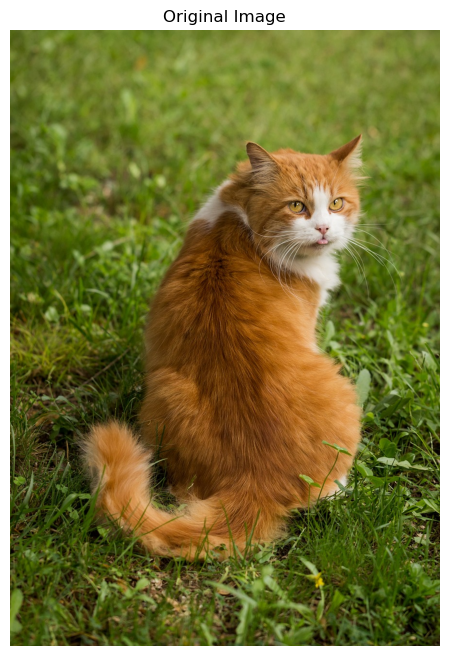

In [7]:
# Load the image, keep in mind if you are using another image and not the one that is already provided , you should change 'cat.jpg' with 
# the name that you gave to your own file iamge.
image = cv2.imread('cat.jpg')

# Convert from BGR (OpenCV default) to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()

In [7]:
# We check image dimensions and data type
print(f"Image Shape: {image.shape}") # (height, width, 3 channels for RGB)
print(f"Data Type: {image.dtype}")   # 8-bit integer values (0-255)

Image Shape: (1280, 892, 3)
Data Type: uint8


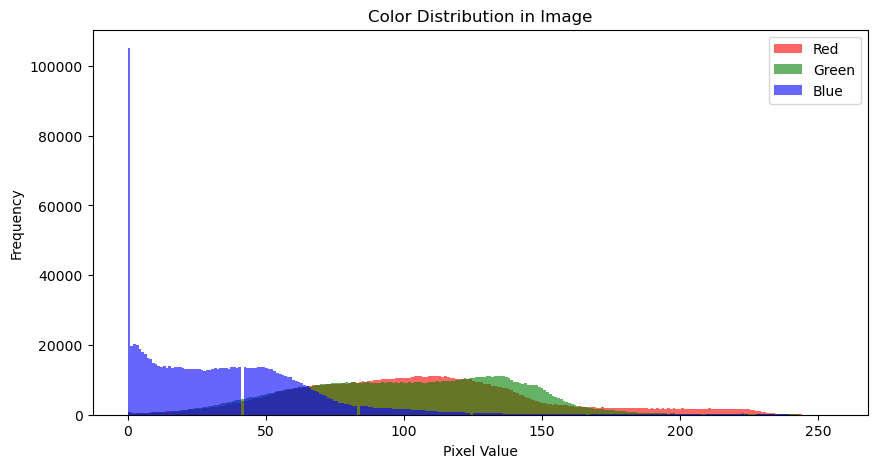

In [11]:
# We analyze how pixel values are distributed for each color channel.

# Split the channels
r, g, b = cv2.split(image)

# Plot the histograms for each color channel
plt.figure(figsize=(10, 5))
plt.hist(r.ravel(), bins=256, color='red', alpha=0.6, label='Red')
plt.hist(g.ravel(), bins=256, color='green', alpha=0.6, label='Green')
plt.hist(b.ravel(), bins=256, color='blue', alpha=0.6, label='Blue')

plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.title("Color Distribution in Image")
plt.show()

In [11]:
# Since image compression with K-Means reduces the number of colors, we first check how many unique colors exist.

# Reshape image to a 2D array (height * width, 3)
pixels = image.reshape(-1, 3)

# Count unique colors
unique_colors = np.unique(pixels, axis=0)
print(f"Number of unique colors: {len(unique_colors)}")

Number of unique colors: 150863


## 4. Preprocess the Image (Section 4):

In [15]:
# Reshape the image into a 2D array (height * width, 3).An image is typically a 3D NumPy array with the shape (height, width, 3) 
# where height represents the number of rows (pixels), width represents the number of columns (pixels)
# and 3 corresponds to the three color channels (Red, Green, Blue - RGB). Using .reshape(-1, 3), the image is flattened into a 2D array
# where -1 automatically calculates the number of rows as height × width (total pixels), and 3 preserves the three color channels. 
# For example, an image with dimensions (100, 100, 3) would be reshaped into (10000, 3), where each row represents a pixel with three values [R, G, B].
pixels = image.reshape(-1, 3)

# Check the shape of the array. This checks the dimensions of the reshaped array to confirm that it has been converted into a 2D array of shape (num_pixels, 3).
print(f"Shape of pixel array: {pixels.shape}")

Shape of pixel array: (1141760, 3)


## 5. Apply K-Means Clustering (Section 5):

In [18]:
# Choose number of clusters (reduced colors)
k = 4  # You can experiment with different values

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(pixels)

# Get the cluster centers (new colors)
cluster_colors = kmeans.cluster_centers_

# Convert back to 8-bit values
cluster_colors = np.round(cluster_colors).astype(int)

print(f"Clustered Colors (New Color Palette with {k} colors):\n", cluster_colors)

Clustered Colors (New Color Palette with 4 colors):
 [[ 56  54   7]
 [133 131  54]
 [199 164 111]
 [ 96  94  25]]


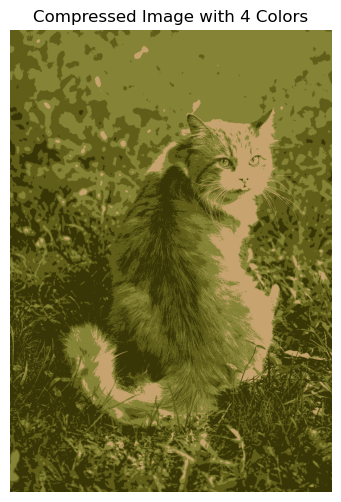

In [108]:
# Get labels for each pixel
labels = kmeans.labels_

# Reconstruct the image using clustered colors
compressed_image = cluster_colors[labels]
compressed_image = compressed_image.reshape(image.shape)

# Display the compressed image
plt.figure(figsize=(6, 6))
plt.imshow(compressed_image)
plt.axis("off")
plt.title(f"Compressed Image with {k} Colors")
plt.show()

In [20]:
# Choose number of clusters (reduced colors)
k = 16  # You can experiment with different values

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(pixels)

# Get the cluster centers (new colors)
cluster_colors = kmeans.cluster_centers_

# Convert back to 8-bit values
cluster_colors = np.round(cluster_colors).astype(int)

print(f"Clustered Colors (New Color Palette with {k} colors):\n", cluster_colors)

Clustered Colors (New Color Palette with 16 colors):
 [[169 108  41]
 [ 83  89  33]
 [137 147  69]
 [216 163 103]
 [102 115  41]
 [ 81  43   6]
 [ 64  80  10]
 [106  63  16]
 [217 208 193]
 [163 164 110]
 [ 87 108  13]
 [ 25  25   2]
 [196 134  65]
 [136  84  27]
 [ 48  55   7]
 [119 133  51]]


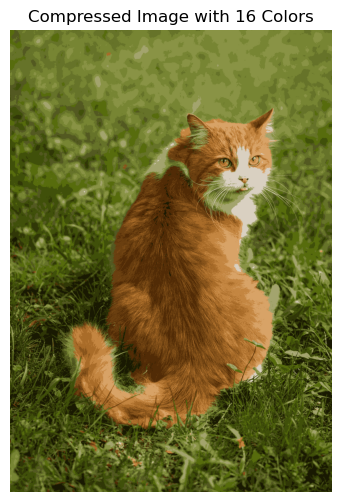

In [112]:
# Get labels for each pixel
labels = kmeans.labels_

# Reconstruct the image using clustered colors
compressed_image = cluster_colors[labels]
compressed_image = compressed_image.reshape(image.shape)

# Display the compressed image
plt.figure(figsize=(6, 6))
plt.imshow(compressed_image)
plt.axis("off")
plt.title(f"Compressed Image with {k} Colors")
plt.show()

## 6. Evaluation and Discussion (Section 6):

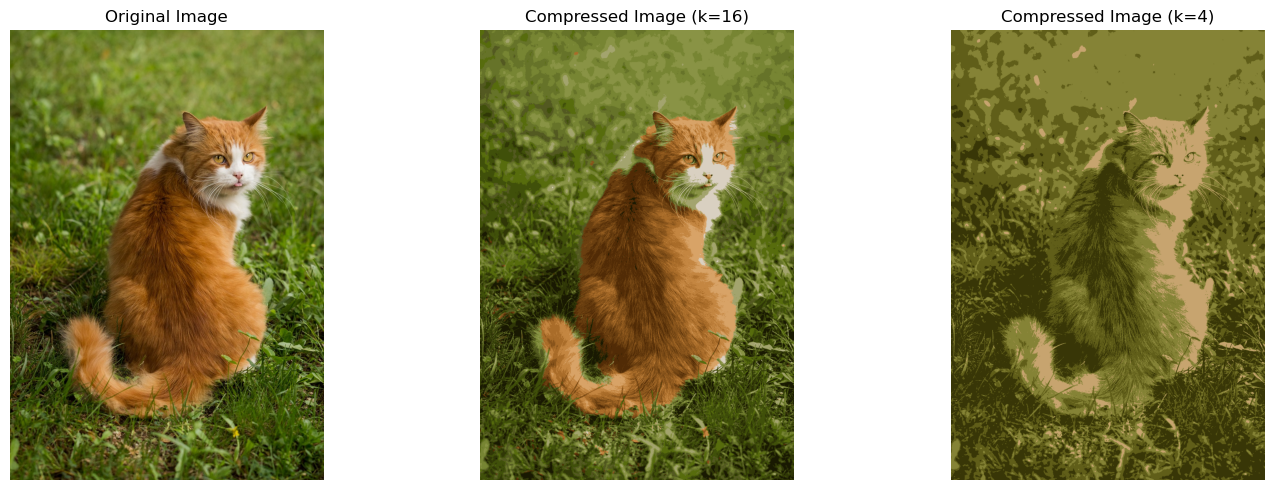

In [116]:
k1 = 16
kmeans_16 = KMeans(n_clusters=k1, random_state=42, n_init=10)
kmeans_16.fit(pixels)
cluster_colors_16 = np.round(kmeans_16.cluster_centers_).astype(int)
labels_16 = kmeans_16.labels_
compressed_image_16 = cluster_colors_16[labels_16].reshape(image.shape)

# Apply K-Means for k=4 
k2 = 4
kmeans_4 = KMeans(n_clusters=k2, random_state=42, n_init=10)
kmeans_4.fit(pixels)
cluster_colors_4 = np.round(kmeans_4.cluster_centers_).astype(int)
labels_4 = kmeans_4.labels_
compressed_image_4 = cluster_colors_4[labels_4].reshape(image.shape)

# Display Original and Compressed Images Side by Side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
axes[0].imshow(image)
axes[0].axis("off")
axes[0].set_title("Original Image")

# Compressed Image (k=16)
axes[1].imshow(compressed_image_16)
axes[1].axis("off")
axes[1].set_title(f"Compressed Image (k={k1})")

# Compressed Image (k=4)
axes[2].imshow(compressed_image_4)
axes[2].axis("off")
axes[2].set_title(f"Compressed Image (k={k2})")

# Show all images
plt.tight_layout()
plt.show()

## 7.Elbow Method (Section 7):

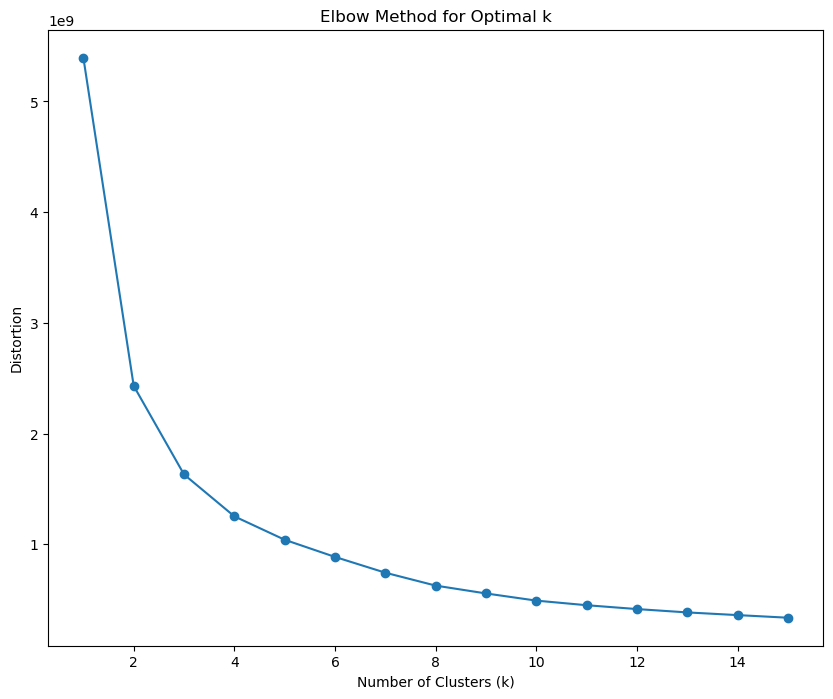

In [14]:
## **7.Elbow Method**
## To find the optimal value of `k`, you can use the Elbow Method.It finds the optimal value of k of the range 1 to 16.

# Implementing the Elbow Method
distortions = []
K_values = range(1, 16)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pixels)
    distortions.append(kmeans.inertia_)

plt.plot(K_values, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

## 8. Conclusion (Section 8):

## 9. References (Section 9):